<a href="https://colab.research.google.com/github/miraculinp/rdkit_descriptors/blob/main/PDE4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#  Install rdkit
!pip install rdkit


In [6]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [26]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

In [27]:
df=pd.read_csv('//content/drive/MyDrive/Machine Learning Chemistry/PDE4AKI.csv')

In [28]:
df.head()

,Smiles
0,COc1ccc(Cn2cnc(N)c3nc([C@@H](C)COc4cccc(F)c4)n...
1,COc1ccc(Cn2cnc(N)c3nc(C(C)(C)COc4ccc(Cl)c(Cl)c...
2,COc1ccc(Cn2cnc(N)c3nc(C(C)(C)COc4ccccc4-c4cccs...
3,COC(=O)c1ccc(OCC(C)(C)c2nc3c(N)ncn(Cc4ccc(OC)c...
4,COc1ccc(F)c(CCCC2CCC(CCNCCCCCN3N=C(c4ccc(OC)c(...


In [29]:
#Generate molecular object from the smiles string
df['mol'] = df['Smiles'].apply(lambda x: Chem.MolFromSmiles(x))
df['mol'] = df['mol'].apply(lambda mol: Chem.AddHs(mol))


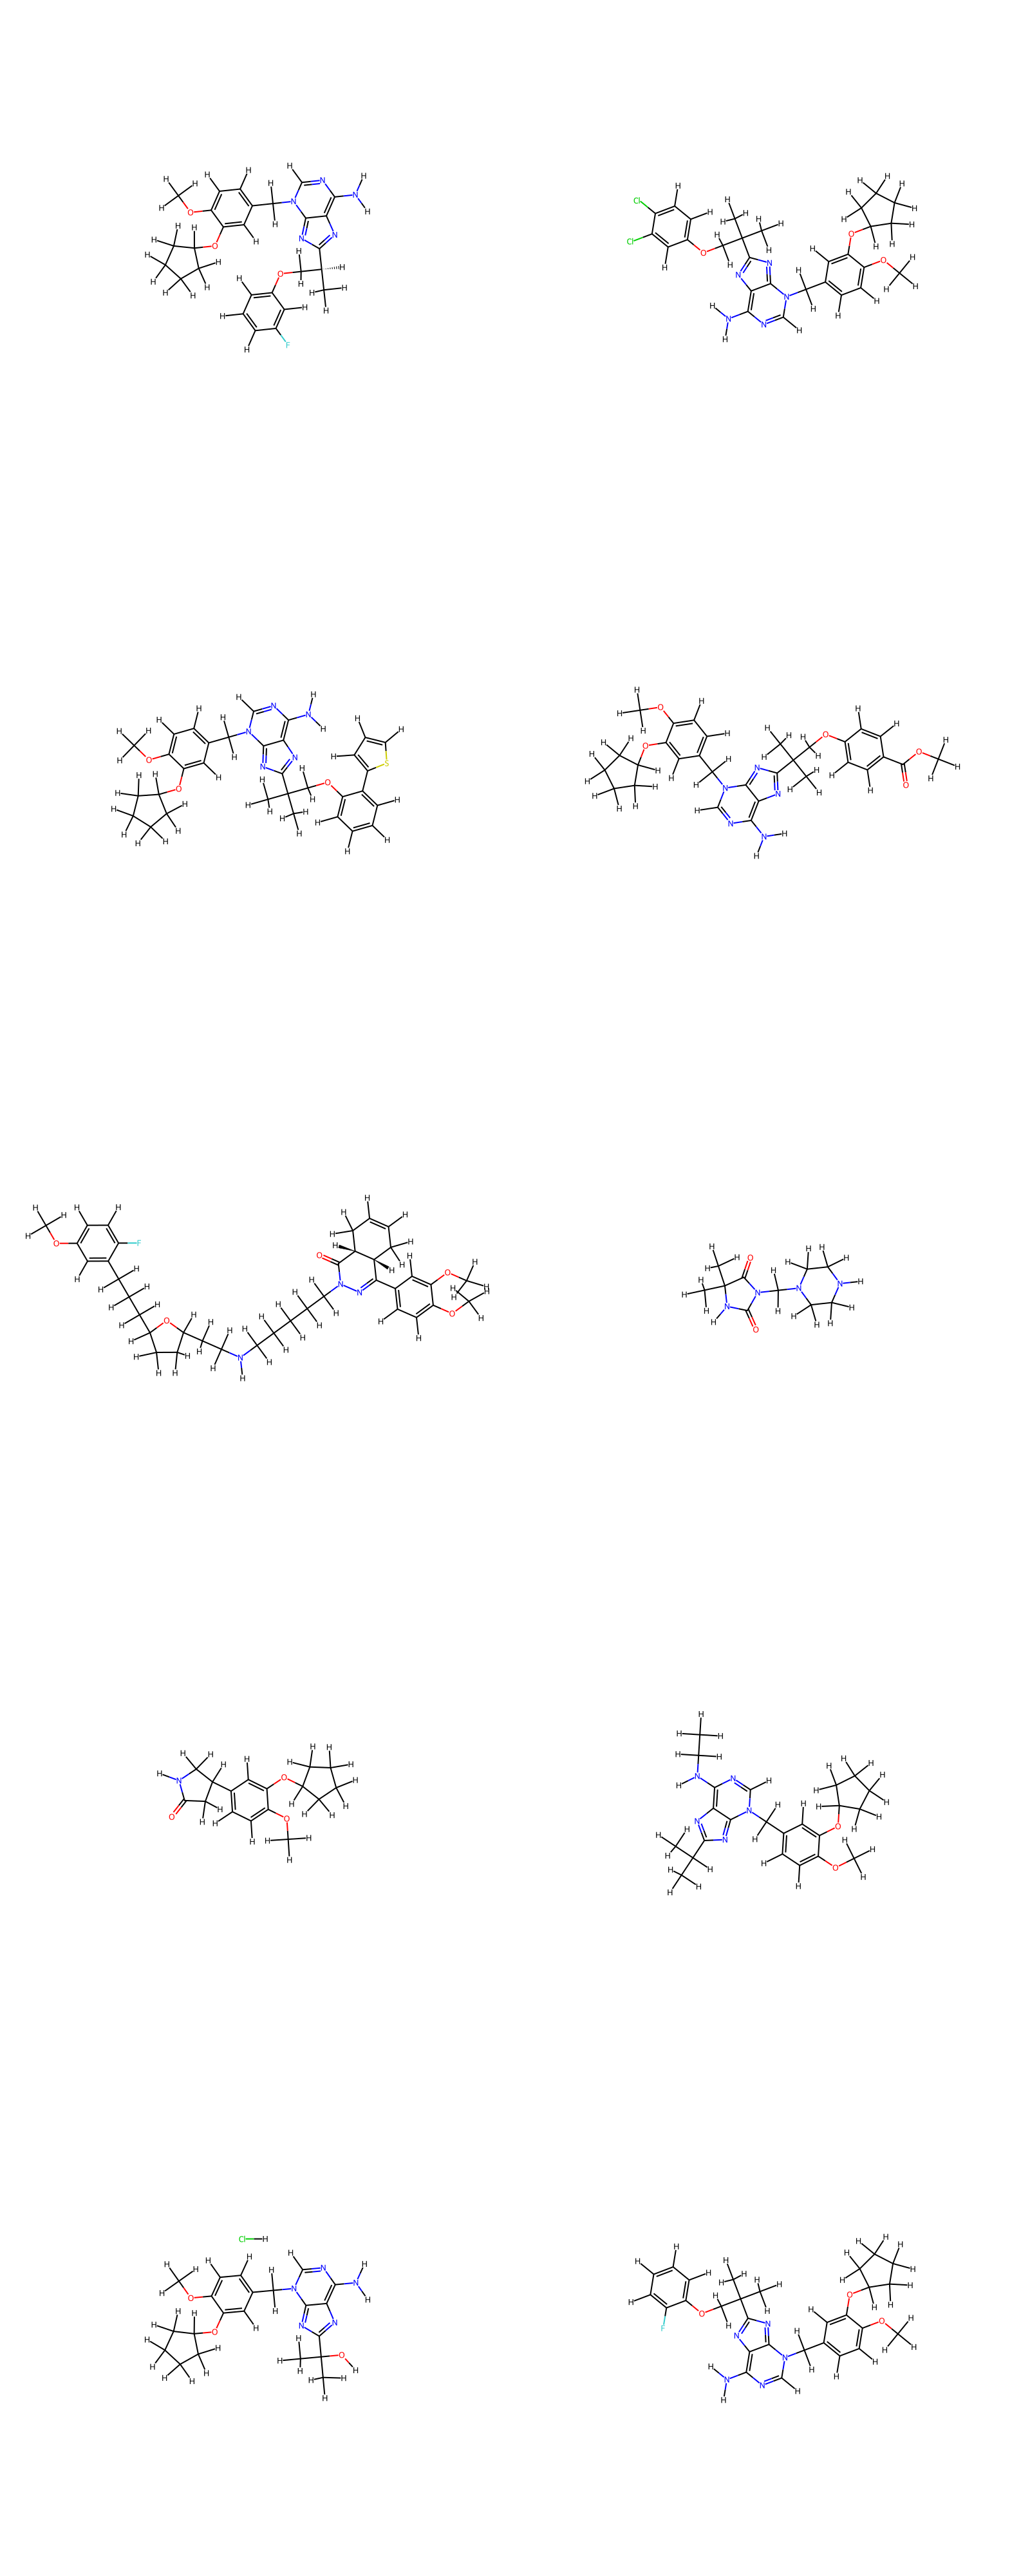

In [30]:
Draw.MolsToGridImage(df['mol'][:10], molsPerRow=2,subImgSize=(800,800))

# **Calculating Molecular Descriptors**

In [33]:
#Calculating a single molecular descriptors for a single molecule
Desc= MoleculeDescriptors.MolecularDescriptorCalculator(['RingCount'])

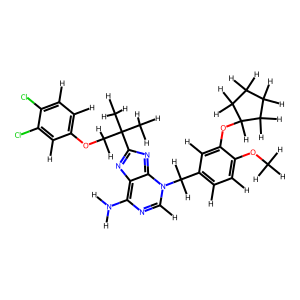

(5,)

In [36]:
display(Draw.MolToImage(df['mol'][1]))
Desc.CalcDescriptors(df['mol'][1])

In [41]:
#Calculating molecular descriptors for all the molecules
Desc_all= MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])

In [42]:
decriptors_all=[]
for mol in df['mol']:
  decriptors_all.append(Desc_all.CalcDescriptors(mol))

In [45]:
descriptors_df=pd.DataFrame(decriptors_all,columns=[x[0] for x in Descriptors._descList])

In [47]:
descriptors_df.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.687601,14.687601,0.137409,-4.245928,0.349474,35.583333,491.567,461.327,491.233268,188,...,0,0,0,0,0,0,0,0,0,0
1,9.281353,9.281353,0.178603,-4.353920,0.254774,33.894737,556.494,525.246,555.180395,200,...,0,0,0,0,0,0,0,0,0,0
2,9.367182,9.367182,0.206364,-4.501922,0.196997,33.609756,569.731,534.451,569.246061,212,...,0,0,0,0,0,0,0,1,0,0
3,12.621833,12.621833,0.243609,-4.566225,0.277653,34.350000,545.640,510.360,545.263819,210,...,0,0,0,0,0,0,0,0,0,0
4,15.870156,15.870156,1.302500,-5.471628,0.153969,53.652174,635.821,585.421,635.373450,250,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#Appending descriptor_df to df
df=pd.concat([df,descriptors_df],axis=1)

In [49]:
df.head()

,Smiles,mol,desc,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,COc1ccc(Cn2cnc(N)c3nc([C@@H](C)COc4cccc(F)c4)n...,<rdkit.Chem.rdchem.Mol object at 0x7bfc6bdf4f20>,"(5,)",14.687601,14.687601,0.137409,-4.245928,0.349474,35.583333,491.567,...,0,0,0,0,0,0,0,0,0,0
1,COc1ccc(Cn2cnc(N)c3nc(C(C)(C)COc4ccc(Cl)c(Cl)c...,<rdkit.Chem.rdchem.Mol object at 0x7bfc6bdf4f90>,"(5,)",9.281353,9.281353,0.178603,-4.353920,0.254774,33.894737,556.494,...,0,0,0,0,0,0,0,0,0,0
2,COc1ccc(Cn2cnc(N)c3nc(C(C)(C)COc4ccccc4-c4cccs...,<rdkit.Chem.rdchem.Mol object at 0x7bfc6bdf5000>,"(6,)",9.367182,9.367182,0.206364,-4.501922,0.196997,33.609756,569.731,...,0,0,0,0,0,0,0,1,0,0
3,COC(=O)c1ccc(OCC(C)(C)c2nc3c(N)ncn(Cc4ccc(OC)c...,<rdkit.Chem.rdchem.Mol object at 0x7bfc6bdf5070>,"(5,)",12.621833,12.621833,0.243609,-4.566225,0.277653,34.350000,545.640,...,0,0,0,0,0,0,0,0,0,0
4,COc1ccc(F)c(CCCC2CCC(CCNCCCCCN3N=C(c4ccc(OC)c(...,<rdkit.Chem.rdchem.Mol object at 0x7bfc6bdf50e0>,"(5,)",15.870156,15.870156,1.302500,-5.471628,0.153969,53.652174,635.821,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#dropping mol column
df.drop('mol',axis=1,inplace=True)

In [54]:
#exporting the csv file of df
df.to_csv('PDE4AKI_descriptors.csv',index=False)
